In [1]:
from read_input import *
import codecs

# Frequency input
Put together the letter and bigram frequency files based on the data that comes from Mathieu. Distributes the frequency of combined characters that are not in the to-be-mapped character set of the scenario and filters out characters that are irrelevant.

In [3]:
scenario="scenarioMAX" #scenario doesn't matter, just need one to get ALL characters
character_set = "setFULL"
print(character_set)
letter_file = "input/resources/Code_all_Avg_freqs_1.tsv"
bigram_file = "input/resources/Code_all_Avg_freqs_2.tsv"
derive_probabilities_from_raw_values(letter_file, bigram_file, scenario, character_set,  "_code")

letter_file = "input/resources/Twitter_all_Avg_freqs_1.tsv"
bigram_file = "input/resources/Twitter_all_Avg_freqs_2.tsv"
derive_probabilities_from_raw_values(letter_file, bigram_file, scenario,character_set, "_twitter")

letter_file = "input/resources/Formals_all_Avg_freqs_1.tsv"
bigram_file = "input/resources/Formals_all_Avg_freqs_2.tsv"
derive_probabilities_from_raw_values(letter_file, bigram_file, scenario,character_set, "_formal")


character_set = "setCAPS"
print(character_set)
letter_file = "input/resources/Code_all_Avg_freqs_1.tsv"
bigram_file = "input/resources/Code_all_Avg_freqs_2.tsv"
derive_probabilities_from_raw_values(letter_file, bigram_file, scenario, character_set,  "_code")

letter_file = "input/resources/Twitter_all_Avg_freqs_1.tsv"
bigram_file = "input/resources/Twitter_all_Avg_freqs_2.tsv"
derive_probabilities_from_raw_values(letter_file, bigram_file, scenario,character_set, "_twitter")

letter_file = "input/resources/Formals_all_Avg_freqs_1.tsv"
bigram_file = "input/resources/Formals_all_Avg_freqs_2.tsv"
derive_probabilities_from_raw_values(letter_file, bigram_file, scenario,character_set, "_formal")


character_set = "setCOMB"
print(character_set)
letter_file = "input/resources/Code_all_Avg_freqs_1.tsv"
bigram_file = "input/resources/Code_all_Avg_freqs_2.tsv"
derive_probabilities_from_raw_values(letter_file, bigram_file, scenario, character_set,  "_code")

letter_file = "input/resources/Twitter_all_Avg_freqs_1.tsv"
bigram_file = "input/resources/Twitter_all_Avg_freqs_2.tsv"
derive_probabilities_from_raw_values(letter_file, bigram_file, scenario,character_set, "_twitter")

letter_file = "input/resources/Formals_all_Avg_freqs_1.tsv"
bigram_file = "input/resources/Formals_all_Avg_freqs_2.tsv"
derive_probabilities_from_raw_values(letter_file, bigram_file, scenario,character_set, "_formal")


character_set = "setCOMBCAPS"
print(character_set)
letter_file = "input/resources/Code_all_Avg_freqs_1.tsv"
bigram_file = "input/resources/Code_all_Avg_freqs_2.tsv"
derive_probabilities_from_raw_values(letter_file, bigram_file, scenario, character_set,  "_code")

letter_file = "input/resources/Twitter_all_Avg_freqs_1.tsv"
bigram_file = "input/resources/Twitter_all_Avg_freqs_2.tsv"
derive_probabilities_from_raw_values(letter_file, bigram_file, scenario,character_set, "_twitter")

letter_file = "input/resources/Formals_all_Avg_freqs_1.tsv"
bigram_file = "input/resources/Formals_all_Avg_freqs_2.tsv"
derive_probabilities_from_raw_values(letter_file, bigram_file, scenario,character_set, "_formal")


setFULL
No frequency for ª
No frequency for ‘
No frequency for -d
No frequency for £
No frequency for §
No frequency for «
No frequency for ‰
No frequency for Ĳ
No frequency for ·
No frequency for »
No frequency for _d
No frequency for ¿
No frequency for Ç
No frequency for Ŋ
No frequency for ¸d
No frequency for Œ
No frequency for ×
No frequency for ß
No frequency for ≤
No frequency for ≠
No frequency for ˝d
No frequency for ç
No frequency for ÷
No frequency for ₩
No frequency for √
No frequency for ¤
No frequency for €
No frequency for ı
No frequency for °
No frequency for ¼
No frequency for À
No frequency for ≃
No frequency for °d
No frequency for †
No frequency for È
No frequency for Ð
No frequency for à
No frequency for è
No frequency for ˘d
No frequency for ˉd
No frequency for ð
No frequency for Ə
No frequency for ˙d
No frequency for θ2
No frequency for ‚
No frequency for „
No frequency for ¡
No frequency for ¥
No frequency for ©
No frequency for ±
No frequency for İ
No frequency f

({u'!': 0.00064037605806140563,
  u'#': 3.7827183015564904e-05,
  u'$': 7.5388897826732645e-06,
  u'%': 0.0002089301536583541,
  u'&': 8.656496942346962e-05,
  u'(': 0.0014708735145794165,
  u')': 0.0016164572705773439,
  u'*': 0.00042397828789992811,
  u'+': 6.2912524774236812e-05,
  u',': 0.0089802730267131824,
  u',d': 1.2396588497591832e-06,
  u'-': 0.0024757943357774817,
  u'-d': 1.1855533245661315e-09,
  u'.': 0.0077491606734353229,
  u'.d': 5.3911692582181269e-07,
  u'/': 0.00053594446606620224,
  u'/d': 2.3296701480346535e-08,
  u'0': 0.0028173304394210662,
  u'1': 0.0026824733674453583,
  u'2': 0.0021136779690790158,
  u'3': 0.00093341345096062899,
  u'4': 0.00077328738783112507,
  u'5': 0.00081363875965131038,
  u'6': 0.00066951750453836574,
  u'7': 0.00067299581033061404,
  u'8': 0.00076184537457437481,
  u'9': 0.0015002929625136426,
  u':': 0.0012756657424276821,
  u';': 0.00046522480316124609,
  u'<': 5.1860114226304857e-06,
  u'=': 4.8808526882618566e-05,
  u'>': 2.619532

### Single letter ranking based on probability, corpora weighted

In [11]:

corpus_weights = {"Formal": 0.5, "Twitter":0.3, "Code":0.2}

letter_files = ["input/resources/Formals_all_Avg_freqs_1.tsv","input/resources/Code_all_Avg_freqs_1.tsv", "input/resources/Twitter_all_Avg_freqs_1.tsv"]
p_single={}
p_bigrams = {}
for l_file in letter_files:
    print(l_file)
    print("weighting corpora")
    single = pd.read_csv(l_file, sep=" ", encoding="utf-8", index_col=0, quoting=3)
    single = single.to_dict()[u'frequency']
    #weight according to given weight:
    weight = 0
    for k,v in corpus_weights.iteritems():
        if k in l_file:
            weight = v
            break;
    if weight == 0:
        raise ValueError('no weight found for file: %s'%l_file)

    if len(p_single) == 0:
        p_single = {c:v*weight for c,v in single.iteritems()}     
    else:
        for c,v in single.iteritems():
            if c in p_single:
                p_single[c]+= v*weight
            else:
                p_single[c] = v*weight

input/resources/Formals_all_Avg_freqs_1.tsv
weighting corpora
input/resources/Code_all_Avg_freqs_1.tsv
weighting corpora
input/resources/Twitter_all_Avg_freqs_1.tsv
weighting corpora


In [34]:
df = pd.DataFrame.from_dict(p_single, orient="index")
df = df.reset_index()
df.columns=["letter", "frequency"]
df = df.sort_values(by="frequency", ascending=False)
with codecs.open("lists/letter_order_all.txt", 'w', encoding="utf-8") as f:
    for i in range(0,len(df)):
        f.write("%s\t%.8f\n"%(df.iloc[i,0], df.iloc[i,1]))
#df.to_csv("lists/letter_order_all.txt", sep="\t", encoding="utf-8", index=False)


# Distances
You only need to rerun this if you need to change the level cost

In [3]:
level_cost = {u'':0, u'Shift':1, u'Alt':2, u'Alt_Shift':3}

distance0, distance1 = read_distance_matrix(level_cost, recompute=0)
lines = ["%s %s %f\n"%(k1,k2,d) for (k1,k2), d in distance0.iteritems()]
with codecs.open("input\\distance0.txt", 'w', encoding="utf-8") as f:
    f.writelines(lines)
    
lines = ["%s %s %f\n"%(k1,k2,d) for (k1,k2), d in distance1.iteritems()]
with codecs.open("input\\distance1.txt", 'w', encoding="utf-8") as f:
    f.writelines(lines)

# Clean the Performance file 
to exclude transitions from B07 and to non-letter keys and transitions from C10 or C10_Shift to letter keys

In [6]:
letter_keys = ["A03","B01","B02","B03","B04","B05","B06","C01","C02","C03","C04","C05","C06","C07","C08","C09","C10","D01",
               "D02","D03","D04","D05","D06","D07","D08","D09","D10"]

perf_file = open("input/performance/performance_daryl.csv", 'r')
new_perf_file = open("input/performance/performance_daryl_cleaned.csv", 'w')

count = 0
for line in perf_file.readlines():
    values = line.split(" ")    
    if (values[0] == "B07" and values[1] not in letter_keys) or (values[1] == "B07" and values[0] not in letter_keys) or \
       (values[0] == "C10" and values[1] in letter_keys) or (values[1] == "C10" and values[0] in letter_keys) or \
        (values[0] == "C10_Shift" and values[1] in letter_keys) or (values[1] == "C10_Shift" and values[0] in letter_keys) :
        count += 1
    else:
        new_perf_file.write(line)
        
new_perf_file.close()
perf_file.close()
    
    
    

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

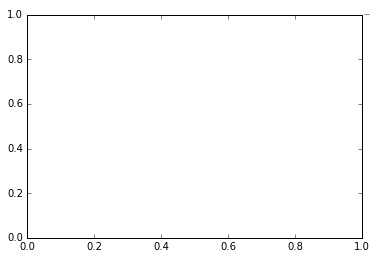

In [18]:
plt.text(1,1,r"$-$")
plt.show()